[<__main__.Options object at 0x000002647D4E2F60>, <__main__.Options object at 0x000002647D4E0830>, <__main__.Options object at 0x000002647D4E2930>]


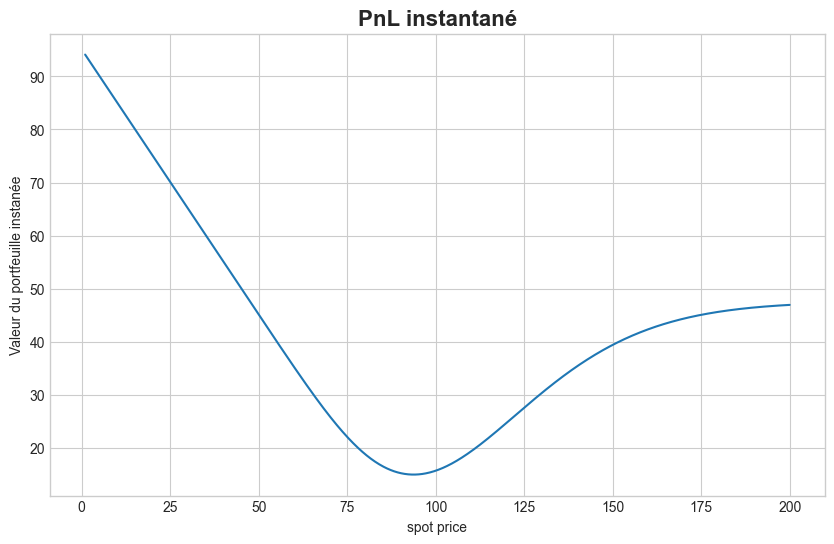

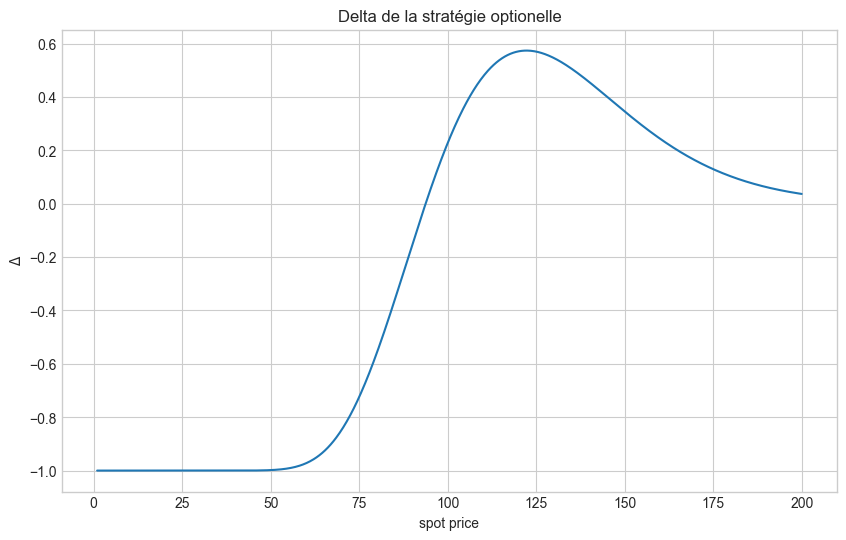

In [87]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm

EPS=1e-12

class MarketData:
    def __init__(self,rate,spot,volatility):
        self.rate=rate
        self.spot=spot
        self.volatility=volatility

class Options:
    def __init__(self,strike,maturity,type,quantity):
        self.strike=strike
        self.maturity=maturity
        self.type=type
        self.quantity=quantity
    def __price__(self,MarketData):
        return self.quantity*bsm_price(
            d1=bsm_d1(
                MarketData.spot,
                self.strike,
                MarketData.volatility,
                self.maturity,
                MarketData.rate),
            d2=bsm_d2(
                MarketData.spot,
                self.strike,
                MarketData.volatility,
                self.maturity,
                MarketData.rate),
            type=self.type,
            spot=MarketData.spot,
            strike=self.strike,
            rate=MarketData.rate,
            maturity=self.maturity)
    def __delta__(self,MarketData):
        return bsm_delta(
            d1=bsm_d1(
                MarketData.spot,
                self.strike,
                MarketData.volatility,
                self.maturity,
                MarketData.rate),
            type=self.type,
            quantity=self.quantity)
    def __gamma__(self,MarketData):
        return bsm_gamma(
            d1=bsm_d1(
                MarketData.spot,
                self.strike,
                MarketData.volatility,
                self.maturity,
                MarketData.rate),
            quantity=self.quantity,
            spot=MarketData.spot,
            volatility=MarketData.volatility,
            maturity=self.maturity)
    def __vega__(self,MarketData):
        return bsm_vega(
            d1=bsm_d1(
                MarketData.spot,
                self.strike,
                MarketData.volatility,
                self.maturity,
                MarketData.rate),
            quantity=self.quantity,
            spot=MarketData.spot,
            maturity=self.maturity)

class Portfolio:
    def __init__(self,option_list):
        self.option_list=option_list
    def __price_portfolio__(self):
        price_portfolio=0
        for i in self.option_list:
            price_portfolio += i.__price__(MD)
        return price_portfolio
    def __delta_portfolio__(self):
        delta_portfolio=0
        for i in self.option_list:
            delta_portfolio += i.__delta__(MD)
        return delta_portfolio
    def __gamma_portfolio__(self):
        gamma_portfolio=0
        for i in self.option_list:
            gamma_portfolio += i.__delta__(MD)
        return gamma_portfolio
        
option_list=[]

Call_1=Options(100,1,1,1)
option_list.append(Call_1)
Call_2=Options(100,1,-1,1)
option_list.append(Call_2)
Call_3=Options(150,1,1,-1)
option_list.append(Call_3)

print(option_list)
O=Portfolio(option_list)

def bsm_d1(spot,strike,volatility,maturity,rate):
    d1=(np.log(spot/strike)+(rate+((volatility**2)/2))*maturity)/(volatility*np.sqrt(maturity))
    return d1

def bsm_d2(spot,strike,volatility,maturity,rate):
    d2=(np.log(spot/strike)+(rate-((volatility**2)/2))*maturity)/(volatility*np.sqrt(maturity))
    return d2

def bsm_price(d1,d2,type,spot,strike,rate,maturity):
    if type==1:
        price=spot*norm.cdf(d1)-np.exp(-rate*maturity)*strike*norm.cdf(d2)
    else:
        price=np.exp(-rate*maturity)*strike*norm.cdf(-d2)-spot*norm.cdf(-d1)
    return price

def bsm_delta(d1,type,quantity):
    if type==1:
        delta=norm.cdf(d1)*quantity
    else:
        delta=(norm.cdf(d1)-1)*quantity
    return delta

def bsm_gamma(d1,quantity,spot,volatility,maturity):
    gamma=(norm.pdf(d1)/(spot*volatility*np.sqrt(maturity)))*quantity
    return gamma

def bsm_vega(d1,quantity,spot,maturity):
    vega=(spot*norm.pdf(d1)*np.sqrt(maturity))*quantity
    return vega


a=np.linspace(1,200,1000)
MD=MarketData(0.05,a,0.2)

P=O.__price_portfolio__()
D=O.__delta_portfolio__()

plt.figure(figsize=(10,6))
plt.plot(a,P)
plt.xlabel('spot price')
plt.ylabel('Valeur du portfeuille instanée')
plt.grid(True)
plt.title('PnL instantané',fontsize=16,fontweight='bold')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(a,D)
plt.xlabel('spot price')
plt.ylabel('Δ')
plt.grid(True)
plt.title('Delta de la stratégie optionelle')
plt.show()
